# compute h(t) from SN2017gax for Ligo, Virgo and hypothetical detector at the North Pole using PyCBC 

Template:    Andresen18/And1


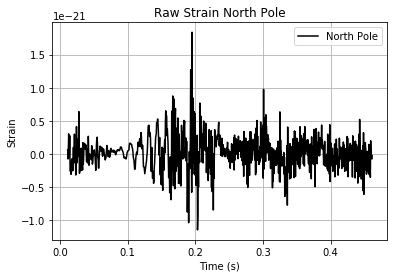

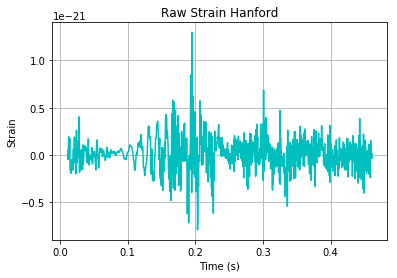

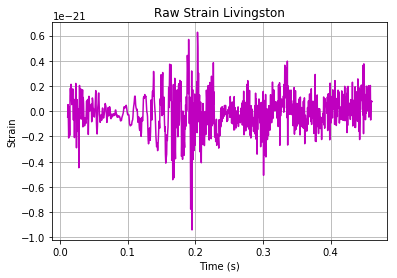

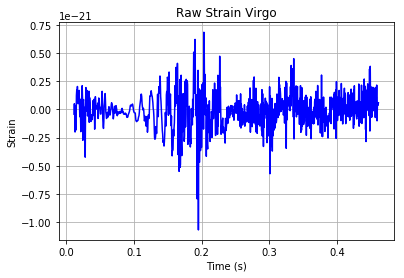

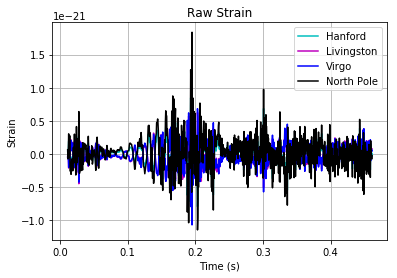

In [10]:
import GW_CCSNeFromCatalog
import numpy as np
import GW_Template
import pycbc
from pycbc.detector import Detector
import pylab

# choose a template
approx = 'And1' # ('And1','Dim1','Ott1','Yak1')

# read and plot raw template
# compute hp, hc from raw data
t, hp, hc, h = GW_CCSNeFromCatalog.Read(approx,0)

# source parameters: SN2017gax
theta = 1.23918376892 # right ascension
phi = -1.02974425868 # declination
psi = 0.2 # random polarization angle
time = 100

# observatories
lab = [Detector('H1'), Detector('L1'), Detector('V1')]
lab_name = ["Hanford", "Livingston", "Virgo"]
colors = ['c','m','b']

fp = []
fc = []

# compute antenna pattern for ligo and virgo
for index in range(len(lab)):
    fp_aux, fc_aux = lab[index].antenna_pattern(theta, phi, psi, time)
    fp.append(fp_aux)
    fc.append(fc_aux)
    # if you're curious about the numbers
    #print(lab_name[index],
    #      "fp: %s, fc: %s" % (str(fp[index]), str(fc[index]))
    #     )

# compute antenna pattern for detector at the north pole
fp_np, fc_np = pycbc.detector.overhead_antenna_pattern(phi, theta, psi)
# if you're curious about the numbers
#print(lab_name[index],
#      "fp: %s, fc: %s" % (str(fp), str(fc))
#     )
    
# set h(t)
h_np = hp * fp_np + hc * fc_np
# if you're curious about the numbers
# print("Strain: %s" % str(h_np))
# plot single signal

# plot every signal 
pylab.figure(1)
pylab.plot(t, h_np, label = 'North Pole', color = 'k')
pylab.title("Raw Strain North Pole")
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.grid()
pylab.legend()
pylab.show()
    
# set h(t)
h = [] 
for index in range(len(fp)):
    h.append(hp * fp[index] + hc * fc[index])
    # if you're curious about the numbers
    # print("Strain: %s" % str(h))
    # plot single signal
    pylab.figure(index + 1)
    pylab.plot(t, h[index], label = lab_name[index], color = colors[index])
    pylab.title("Raw Strain " + lab_name[index])
    pylab.ylabel('Strain')
    pylab.xlabel('Time (s)')
    pylab.grid()
    pylab.show()

# plot every signal 
pylab.plot(t, h[0], label = lab_name[0], color = colors[0])
pylab.plot(t, h[1], label = lab_name[1], color = colors[1])
pylab.plot(t, h[2], label = lab_name[2], color = colors[2])
pylab.plot(t, h_np, label = 'North Pole', color = 'k')
pylab.title("Raw Strain")
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.grid()
pylab.legend()
pylab.show()